***1. Binary Perceptron.***

**In this problem, you will code up the (binary) Perceptron algorithm and use it to
classify the Iris data set.**

*(a) Write code for two functions: <br>
•The first function takes as input parameters w,b of a linear classifier as well as a data point
x, and returns the label for that point: sign(w ·x + b). The label is either +1 or −1. <br>
•The second function takes as input an array of data points and an array of labels (where each
label is +1 or −1), and runs the Perceptron algorithm to learn a linear classifier w,b. The
algorithm should begin by randomly permuting the data points.*

In [1]:
import numpy as np

In [2]:
def predict_label(w, b, x):
    loss = np.dot(w,x) + b
    if loss <= 0:
        return -1
    else:
        return 1

In [3]:
import random
def run_perceptron(x,y):
    w = np.zeros(2)
    b = 0
    #to count all the updates
    update_cnt = 0
    while True:
        #to count updates for that iteration
        cnt = 0
        for i in random.sample(range(len(x)),len(x)):   #random permutation
            permuted_x = x[i]
            permuted_y = y[i]
            predicted_label = predict_label(w,b,permuted_x)
            if predicted_label != permuted_y:
                w += permuted_y * permuted_x
                b += permuted_y
                #print("Random Index - {0}, W = {1}, b = {2}, predicted_label = {3}, actual_label = {4}".format(i,w,b,predicted_label,permuted_y))
                cnt += 1
                update_cnt += 1
        if cnt == 0:
            #print("Perceptron ending at W = {0}, b = {1} after {2} updates !!".format(w,b,update_cnt))
            break
    return w,b,update_cnt

*(b) Load in the Iris data set. You can do this by simply invoking:*

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

print("size of x", x.shape)
print("size of y", y.shape)

size of x (150, 4)
size of y (150,)


In [5]:

x = x[:,[1,3]]
idxs = np.where((y==0) | (y==1))
x = x[idxs]
y = y[idxs]
y[y==0] = -1

print("size of x", x.shape)
print("size of y", y.shape)

size of x (100, 2)
size of y (100,)


*(c) Now run the Perceptron algorithm on the data. In your writeup, show a plot with the data points
(where the two labels have different colors) and the resulting decision boundary.*

In [6]:
#Running the perceptron
w,b,update_cnt = run_perceptron(x,y)

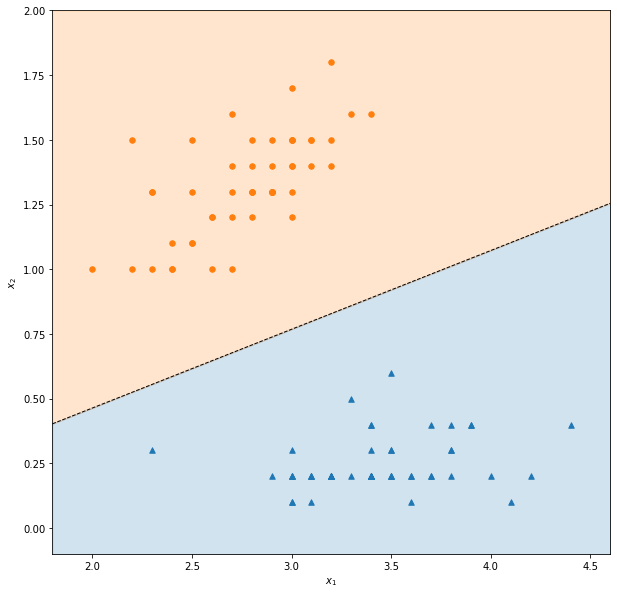

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
plt.figure(figsize=(10, 10))
#Referred https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/

w1,w2 = w.T
#print("coefficients: ",w1, w2)
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.

#This is to keep the scale of the graph to show all points getting min and max 
xmin,ymin = min(x[:,0])-0.2, min(x[:,1])-0.2
xmax,ymax = max(x[:,0])+0.2, max(x[:,1])+0.2

xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')


plt.scatter(*x[y==-1].T, s=30, marker="^", alpha=1)
plt.scatter(*x[y==1].T, s=30, marker="o", alpha=1)
plt.show()

*(d) Now modify your code from part (a) to count the number of updates made by the Perceptron
algorithm while it is learning. Run the algorithm 20 times and keep track of the number of
updates needed each time. In your writeup, include a histogram of these values.*

In [8]:
#to store the iteration and number of updates in perceptron algorithm
dict_updates = {}
for j in range(20):
    w,b,update_cnt = run_perceptron(x,y)
    dict_updates[j] = update_cnt

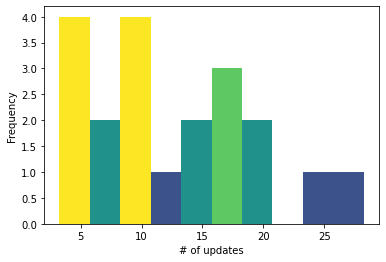

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


n_bins = 10

# Generate normal distributions
dist1 = list(dict_updates.values())


# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = plt.hist(dist1, bins=n_bins, align='right')

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.xlabel('# of updates')
plt.ylabel('Frequency')
plt.show()